# Us flight delay Plot
This is some visulization of the us flight delays.   
        - Ran Tian    
        - University of Minnesota   
        - tianran0039@gmail.com
        - 2016/10/29

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

## Load the data and clean
The data here is for the flight details of the 2016 in [US Transportation](http://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236)

In [16]:
# define the data path 
import os
__file__  = os.path.abspath('proposal_plot')
data_dir = __file__ + '\\..\\airline_data'

In [17]:
# load all the csv and concatenate into one df
df_total = pd.DataFrame()
for i in range(2,10):
    data_path = data_dir + '\\{}.csv'.format(i)
    df_tmp = pd.read_csv(data_path)
    df_total = pd.concat([df_total,df_tmp])
    print 'has finished load {}.csv'.format(i)
    del df_tmp

has finished load 2.csv
has finished load 3.csv
has finished load 4.csv
has finished load 5.csv
has finished load 6.csv
has finished load 7.csv
has finished load 8.csv
has finished load 9.csv


In [19]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3778267 entries, 0 to 498346
Data columns (total 25 columns):
YEAR                     int64
MONTH                    int64
DAY_OF_MONTH             int64
DAY_OF_WEEK              int64
FL_DATE                  object
UNIQUE_CARRIER           object
AIRLINE_ID               int64
ORIGIN_AIRPORT_ID        int64
ORIGIN_AIRPORT_SEQ_ID    int64
ORIGIN                   object
ORIGIN_CITY_NAME         object
ORIGIN_STATE_ABR         object
ORIGIN_STATE_NM          object
DEST_AIRPORT_ID          int64
DEST_AIRPORT_SEQ_ID      int64
DEST                     object
DEST_CITY_NAME           object
DEST_STATE_ABR           object
DEST_STATE_NM            object
DEP_DELAY                float64
ARR_DELAY                float64
CANCELLED                float64
CANCELLATION_CODE        object
AIR_TIME                 float64
Unnamed: 24              float64
dtypes: float64(5), int64(9), object(11)
memory usage: 749.5+ MB


In [20]:
df_total.head(5)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_DELAY,ARR_DELAY,CANCELLED,CANCELLATION_CODE,AIR_TIME,Unnamed: 24
0,2016,2,3,3,2016-02-03,AA,19805,11298,1129804,DFW,...,DTW,"Detroit, MI",MI,Michigan,46.0,21.0,0.0,NaN,116.0,NaN
1,2016,2,4,4,2016-02-04,AA,19805,11298,1129804,DFW,...,DTW,"Detroit, MI",MI,Michigan,1.0,-15.0,0.0,NaN,121.0,NaN
2,2016,2,5,5,2016-02-05,AA,19805,11298,1129804,DFW,...,DTW,"Detroit, MI",MI,Michigan,-3.0,-17.0,0.0,NaN,121.0,NaN
3,2016,2,6,6,2016-02-06,AA,19805,11298,1129804,DFW,...,DTW,"Detroit, MI",MI,Michigan,-5.0,4.0,0.0,NaN,146.0,NaN
4,2016,2,7,7,2016-02-07,AA,19805,11298,1129804,DFW,...,DTW,"Detroit, MI",MI,Michigan,-3.0,-6.0,0.0,NaN,130.0,NaN


    Drop the rows with NA delay time

In [31]:
df_delay = df_total.dropna(how = 'any',subset=['ARR_DELAY'])

In [27]:
df_total.ARR_DELAY.isnull().value_counts()

False    3716961
True       61306
Name: ARR_DELAY, dtype: int64

In [33]:
df_delay.head(5)
df_delay.shape

(3716961, 25)

In [34]:
del df_total

## Plot 1: Flight delay statistics for different states and airport

    here the field ARR_DELAY can be negtive if it arrive early, set it to zero if it is negtive

In [35]:
df_delay['ARR_DELAY'][df_delay.ARR_DELAY < 0] = 0
df_delay.ARR_DELAY.describe() # we see more than half of the flights are not delayed or even arrives earlier

C:\Users\tianr_000\PycharmProjects\data_analysis\models\data_incubator_challenge\proposal_plot:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Study_Software\Anaconda2\lib\site-packages\pandas\core\generic.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Study_Software\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2885: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


count    3.716961e+06
mean     1.254753e+01
std      3.942665e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      1.971000e+03
Name: ARR_DELAY, dtype: float64

    Consider top(tail) five state with most(least) delay times and delay ratios(number of delay flights / total number of flights),here I consider the origin state name to count for delay.

In [38]:
df_delay.ORIGIN_STATE_NM.value_counts().head(5) # CA  is the most busy

California    477071
Texas         382442
Florida       302510
Georgia       265397
Illinois      223963
Name: ORIGIN_STATE_NM, dtype: int64

In [39]:
df_delay.ORIGIN_STATE_NM.value_counts().tail(5) # well, seems like West Virginia is not busy. ~.~

New Hampshire                                     4279
Maine                                             4265
Vermont                                           2612
West Virginia                                     1687
U.S. Pacific Trust Territories and Possessions     328
Name: ORIGIN_STATE_NM, dtype: int64

In [40]:
grouped_state = df_delay.groupby('ORIGIN_STATE_NM')

In [45]:
state_delay_count = grouped_state.apply(lambda x : len(x[x['ARR_DELAY'] > 0]) )
state_delay_count.sort_values(inplace=True,ascending=False)
state_delay_count.head(5)

ORIGIN_STATE_NM
California    187122
Texas         141018
Florida       108366
Illinois       85351
Georgia        84557
dtype: int64

In [47]:
state_delay_ratio = grouped_state.apply(lambda x: len(x[x['ARR_DELAY'] > 0]) * 1.0 / len(x) )
state_delay_ratio.sort_values(inplace = True,ascending=False)
state_delay_ratio.head(5) 

ORIGIN_STATE_NM
Nevada           0.395172
California       0.392231
Illinois         0.381094
West Virginia    0.379964
Arizona          0.375697
dtype: float64

    Consider top(tail) five airports most(least) delay times and delay ratios(number of delay flights / total number of flights),here I consider the origin city name to count for delay airport.

In [48]:
grouped_airport = df_delay.groupby('ORIGIN_CITY_NAME')

In [49]:
airport_daley_count = grouped_airport.apply(lambda x : len(x[x['ARR_DELAY'] > 0]) )
airport_daley_count.sort_values(inplace = True, ascending = False)
airport_daley_count.head(5)

ORIGIN_CITY_NAME
Chicago, IL              83525
Atlanta, GA              81697
Los Angeles, CA          59768
Dallas/Fort Worth, TX    53312
Denver, CO               52411
dtype: int64

In [51]:
airport_delay_ratio = grouped_airport.apply(lambda x: len(x[x['ARR_DELAY'] > 0]) * 1.0 / len(x) )
airport_delay_ratio.sort_values(inplace = True,ascending=False)
airport_delay_ratio.head(5) # seems like the those airs are small airport

ORIGIN_CITY_NAME
Grand Island, NE           0.660194
Abilene, TX                0.576923
North Bend/Coos Bay, OR    0.536458
Martha's Vineyard, MA      0.500000
Santa Fe, NM               0.495856
dtype: float64

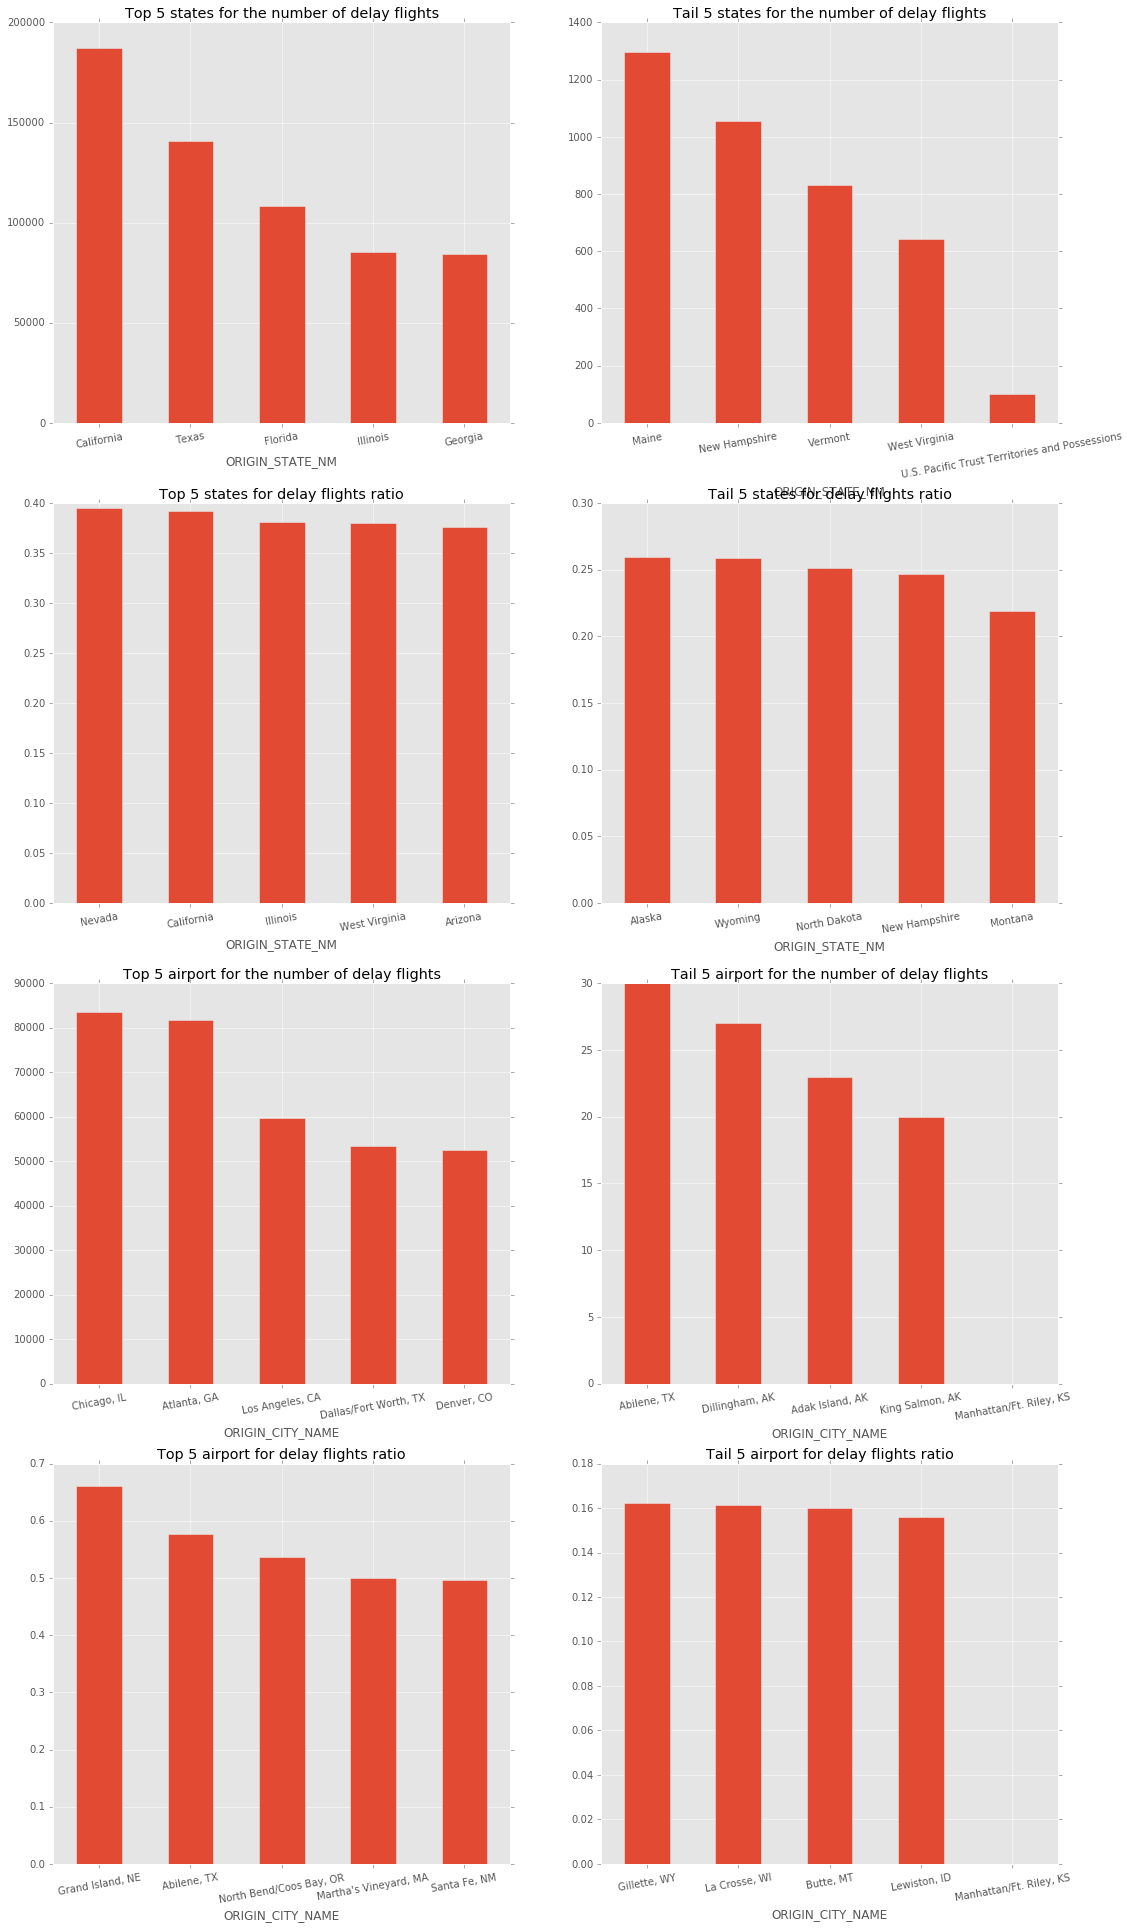

In [137]:
# state_delay_count.head(5).plot(subplots=True, layout=(1,2),kind='bar')
# state_delay_ratio.tail(5).plot(subplots=True, layout=(1,2),kind='bar')

plt.figure(figsize=(18,33))


plt.subplot(4,2,1)
plt.title('Top 5 states for the number of delay flights')
state_delay_count.head(5).plot(kind='bar',rot=10)

plt.subplot(4,2,2)
plt.title('Tail 5 states for the number of delay flights')
state_delay_count.tail(5).plot(kind='bar',rot=10)

plt.subplot(4,2,3)
plt.title('Top 5 states for delay flights ratio')
state_delay_ratio.head(5).plot(kind='bar',rot=10)

plt.subplot(4,2,4)
plt.title('Tail 5 states for delay flights ratio')
state_delay_ratio.tail(5).plot(kind='bar',rot =10)

plt.subplot(4,2,5)
plt.title('Top 5 airport for the number of delay flights')
airport_daley_count.head(5).plot(kind='bar',rot =10)

plt.subplot(4,2,6)
plt.title('Tail 5 airport for the number of delay flights')
airport_daley_count.tail(5).plot(kind='bar',rot =10)

plt.subplot(4,2,7)
plt.title('Top 5 airport for delay flights ratio')
airport_delay_ratio.head(5).plot(kind='bar',rot =10)

plt.subplot(4,2,8)
plt.title('Tail 5 airport for delay flights ratio')
airport_delay_ratio.tail(5).plot(kind='bar',rot =10)


## Plot 2: Flight delays for different airlines and different months

    Load the table for airline name and merge 

In [98]:
df_delay.head(2)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_DELAY,ARR_DELAY,CANCELLED,CANCELLATION_CODE,AIR_TIME,Unnamed: 24
0,2016,2,3,3,2016-02-03,AA,19805,11298,1129804,DFW,...,DTW,"Detroit, MI",MI,Michigan,46.0,21.0,0.0,NaN,116.0,NaN
1,2016,2,4,4,2016-02-04,AA,19805,11298,1129804,DFW,...,DTW,"Detroit, MI",MI,Michigan,1.0,0.0,0.0,NaN,121.0,NaN


In [108]:
data_path = data_dir + '\\airline_id_map.csv'
df_airline_map = pd.read_csv(data_path,delimiter=',',names=['code','airline_name'],skiprows=1)
df_airline_map.head(5)

,code,airline_name
0,19031,Mackey International Inc.: MAC
1,19032,Munz Northern Airlines Inc.: XY
2,19033,Cochise Airlines Inc.: COC
3,19034,Golden Gate Airlines Inc.: GSA
4,19035,Aeromech Inc.: RZZ


In [110]:
df_merge = pd.merge(df_delay,df_airline_map,left_on='AIRLINE_ID',right_on='code',how='left')
df_merge.head(2)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST_STATE_ABR,DEST_STATE_NM,DEP_DELAY,ARR_DELAY,CANCELLED,CANCELLATION_CODE,AIR_TIME,Unnamed: 24,code,airline_name
0,2016,2,3,3,2016-02-03,AA,19805,11298,1129804,DFW,...,MI,Michigan,46.0,21.0,0.0,NaN,116.0,NaN,19805,American Airlines Inc.: AA
1,2016,2,4,4,2016-02-04,AA,19805,11298,1129804,DFW,...,MI,Michigan,1.0,0.0,0.0,NaN,121.0,NaN,19805,American Airlines Inc.: AA


    calculate the statistics for different airlines

In [113]:
grouped_airline = df_merge.groupby('airline_name')

In [119]:
airline_delay_count = grouped_airline.apply(lambda x: len(x[x['ARR_DELAY'] > 0]) )
airline_delay_count.sort_values(inplace=True,ascending=False)
airline_delay_count.head(5) # oH, those airports has the most delays 

airline_name
Southwest Airlines Co.: WN      329882
American Airlines Inc.: AA      236521
Delta Air Lines Inc.: DL        167250
SkyWest Airlines Inc.: OO       133254
ExpressJet Airlines Inc.: EV    108845
dtype: int64

In [118]:
airline_delay_ratio = grouped_airline.apply(lambda x: len(x[x['ARR_DELAY'] > 0]) * 1.0 / len(x) )
airline_delay_ratio.sort_values(inplace=True,ascending=False)
airline_delay_ratio.head(5) # well the ratio is different from the count

airline_name
Spirit Air Lines: NK          0.461416
Virgin America: VX            0.443017
JetBlue Airways: B6           0.412149
American Airlines Inc.: AA    0.387499
Southwest Airlines Co.: WN    0.386103
dtype: float64

    calculate the statistics for different months

In [120]:
grouped_month = df_delay.groupby('MONTH')

In [122]:
month_delay_count = grouped_month.apply(lambda x: len(x[x['ARR_DELAY'] > 0]) )
month_delay_count # well. seems more delays in the summer, it make sense since there will be more vacations in the summer

MONTH
1    142281
2    123475
3    164326
4    141381
5    157507
6    184482
7    194943
8    184382
dtype: int64

In [123]:
month_delay_ratio = grouped_month.apply(lambda x:len(x[x['ARR_DELAY'] > 0]) * 1.0 / len(x) )
month_delay_ratio # make sense, summer times are always the crowded time

MONTH
1    0.328368
2    0.296746
3    0.347202
4    0.309569
5    0.331246
6    0.383605
7    0.396873
8    0.376317
dtype: float64

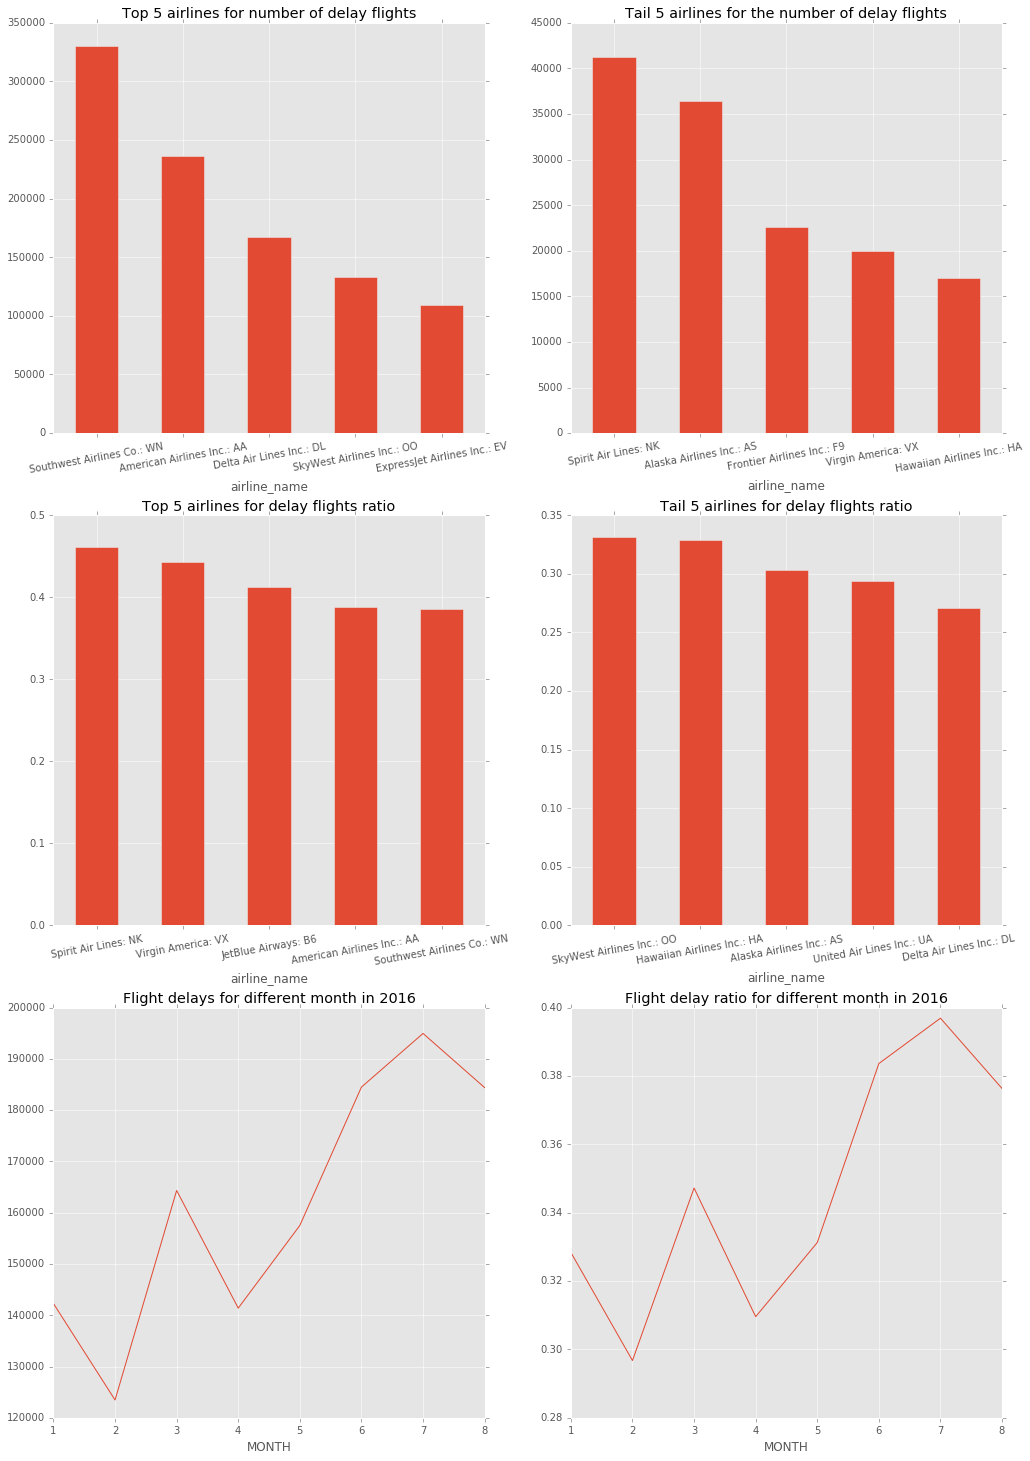

In [139]:
plt.figure(figsize=(17,25))


plt.subplot(3,2,1)
plt.title('Top 5 airlines for number of delay flights')
airline_delay_count.head(5).plot(kind='bar',rot=10)

plt.subplot(3,2,2)
plt.title('Tail 5 airlines for the number of delay flights')
airline_delay_count.tail(5).plot(kind='bar',rot=10)

plt.subplot(3,2,3)
plt.title('Top 5 airlines for delay flights ratio')
airline_delay_ratio.head(5).plot(kind='bar',rot=10)

plt.subplot(3,2,4)
plt.title('Tail 5 airlines for delay flights ratio')
airline_delay_ratio.tail(5).plot(kind='bar',rot =10)

plt.subplot(3,2,5)
plt.title('Flight delays for different month in 2016')
month_delay_count.plot(rot=0)
plt.subplot(3,2,6)
plt.title('Flight delay ratio for different month in 2016')
month_delay_ratio.plot(rot=0)

   well, still more steps for analyzing....